In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import joblib
import pickle as pkl
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

#### chargement des donnée de test

In [2]:
X_test = joblib.load("X_test.joblib")

In [3]:
y_test = joblib.load("y_test.joblib")

#### chargement de modèle

In [4]:
model_lr = joblib.load("clf_lr_best.pkl")

In [5]:
model_lr

LogisticRegression(C=0.01, class_weight='balanced', random_state=42,
                   warm_start=True)

#### test avec le modèle

In [6]:
y_test_pred = model_lr.predict(X_test)

In [7]:
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'test accuracy: {accuracy_test}')

test accuracy: 0.88012


In [8]:
"""# test score = accuracy
model_svc_c10.score(X_test, y_test)"""

'# test score = accuracy\nmodel_svc_c10.score(X_test, y_test)'

In [9]:
#from sklearn.metrics import f1_score

In [10]:
f1 = f1_score(y_test, y_test_pred)
print('F1 score for test: {:.3f}'.format(f1))

F1 score for test: 0.881


#### Courbe ROC, AUC for test

In [11]:
roc_auc_score = roc_auc_score(y_test, y_test_pred)

In [12]:
print('AUC_test : {:.3f}'.format(roc_auc_score))

AUC_test : 0.880


In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
print('AUC_test : {:.3f}'.format(roc_auc))

AUC_test : 0.880


In [15]:
from sklearn.metrics import plot_roc_curve

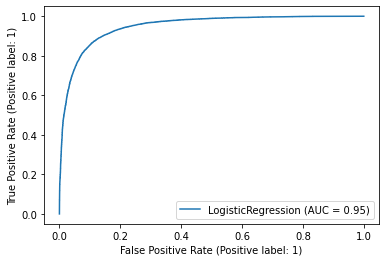

In [16]:
plot_roc_curve(model_lr, X_test, y_test) 
plt.show()

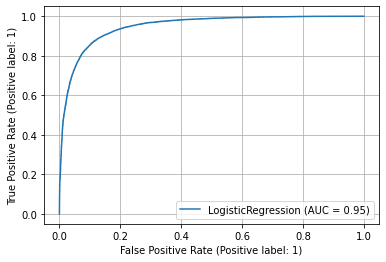

In [17]:
plot_roc_curve(model_lr, X_test, y_test) 
plt.grid()
plt.show()

#### matrix de confusion

In [18]:
#création de matrix de confusion
cm_test = confusion_matrix(y_test, y_test_pred)

In [19]:
cm_test

array([[10910,  1590],
       [ 1407, 11093]], dtype=int64)

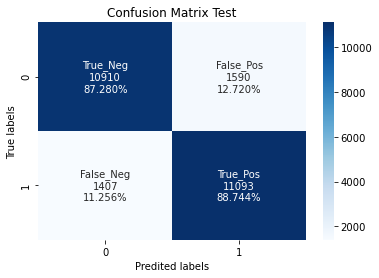

In [20]:
#pour RAJOUTER les labels et les pourcentages sur le graphique, passer par seaborn
#fig = plt.figure(figsize=(15, 7), dpi=100)
ax= plt.subplot()

group_names = ['True_Neg','False_Pos','False_Neg','True_Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm_test.flatten()]
group_percentages1 = ["{0:.3%}".format(value) for value in cm_test.flatten()[0:2]/np.sum(cm_test.flatten()[0:2])]
group_percentages2 = ["{0:.3%}".format(value) for value in cm_test.flatten()[2:]/np.sum(cm_test.flatten()[2:])]
group_percentages = np.append(group_percentages1, group_percentages2).tolist()
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.array(labels).reshape(2,2)

sns.heatmap(cm_test, annot=labels, fmt='', cmap='Blues')

ax.set_xlabel('Predited labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix Test') 

plt.show()

ROC曲線(Receiver Operatorating Characteristic curve)は，受信者動作特性曲線とも呼ばれており，二値分類タスクの評価指標です。

具体的には，各データに対してスコアを定めて，ある閾値を上回るか下回るかで二値に識別するタスクにおいて，閾値を変化させることで「FPR」と「TPR」がどのように変化していくかを表した図がROC曲線になります。ROC曲線の横軸は「FPR」，縦軸は「TPR」になっています。

    TPR：モデルが正と判断して正解だった割合
    FPR：モデルが正と判断して不正解だった割合
    
    

AUC（Area Under the Curve）は，ROC曲線の下側面積のことを指します。一般に，AUCは大きければ大きいほど良いとされています。なぜなら，AUCが1ということは，閾値を適切に定めれば「陽性と判断して陰性と間違う可能性がない」ことを意味します。いわば，テストデータの陽性に対して完ぺきな分類器が生成できていることを意味します。

逆に，AUCが0.5に近いということは，ランダムな分類器ができてしまっていることを意味します。陰性と陽性の出力をランダムにすれば，正解する割合も0.5であるため，AUCは0.5に近づくからです。

https://note.nkmk.me/python-sklearn-roc-curve-auc-score/

https://ichi.pro/shizen-gengo-shori-no-shoshinshamuke-gaido-pa-to-1-126973807478989

https://tips-memo.com/python-roc

https://tech-blog.optim.co.jp/entry/2021/05/31/100000#ROC%E6%9B%B2%E7%B7%9A%E3%81%A8AUC